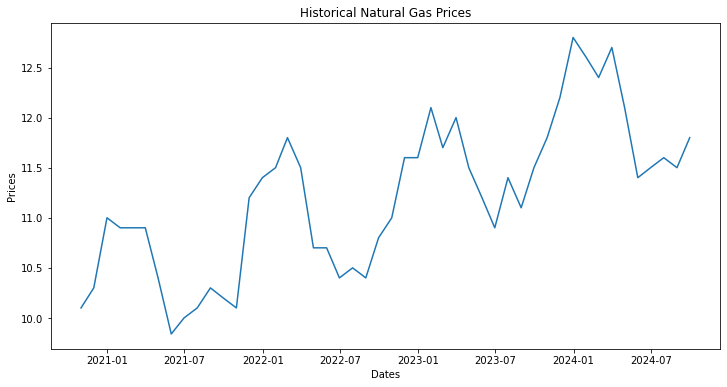

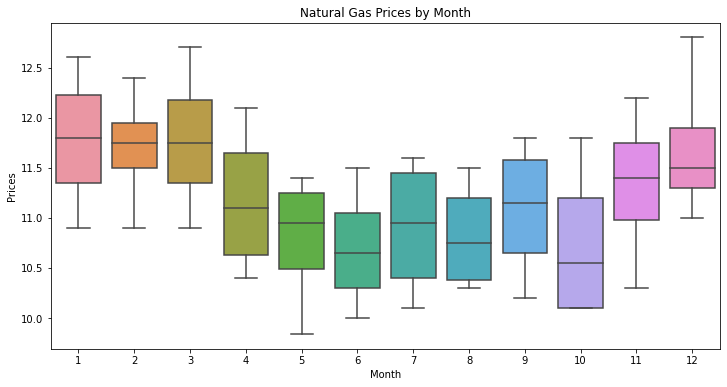

12.870000000000003


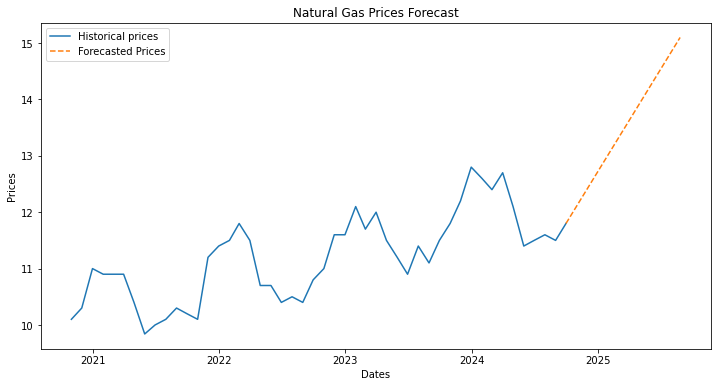

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from datetime import timedelta

# Load and inspect data
file_path = 'Downloads/Nat_Gas.csv'
data = pd.read_csv(file_path)
data['Dates'] = pd.to_datetime(data['Dates'])

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Dates', y='Prices')
plt.title('Historical Natural Gas Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

data['Month'] = data['Dates'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Month', y='Prices')
plt.title('Natural Gas Prices by Month')
plt.xlabel('Month')
plt.ylabel('Prices')
plt.show()

future_dates, future_prices = extrapolate_prices('2024-09-30',12)
plt.figure(figsize=(12,6))
plt.plot(data['Dates'],data['Prices'], label = 'Historical prices')
plt.plot(future_dates,future_prices, '--', label = 'Forecasted Prices')
plt.title('Natural Gas Prices Forecast')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show

# Interpolation
data = data.sort_values('Dates')
dates = data['Dates'].map(pd.Timestamp.toordinal)
prices = data['Prices']
interpolation_func = interp1d(dates, prices, kind='linear', fill_value='extrapolate')

def estimate_price(date):
    date_ordinal = pd.Timestamp(date).toordinal()
    return interpolation_func(date_ordinal)

# Extrapolation
def extrapolate_prices(start_date, months_ahead):
    future_dates = [pd.Timestamp(start_date) + timedelta(days=30 * i) for i in range(months_ahead)]
    future_prices = [estimate_price(date) for date in future_dates]
    return future_dates, future_prices

def get_price_estimate(date, months_ahead=0):
    if pd.Timestamp(date) > data['Dates'].max():
        future_dates, future_prices = extrapolate_prices(data['Dates'].max(), months_ahead)
        if pd.Timestamp(date) in future_dates:
            return future_prices[future_dates.index(pd.Timestamp(date))]
    return estimate_price(date)

# Example usage
print(get_price_estimate('2025-01-15'))